In [1]:
from PIL import Image
import sys

sys.path.append("../")

from diffusersplus.utils.data_utils import image_grid

c:\Users\kadir\miniconda3\envs\torch_gpu\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
A matching Triton is not available, some optimizations will not be enabled.
Error caught was: No module named 'triton'
c:\Users\kadir\miniconda3\envs\torch_gpu\lib\site-packages\controlnet_aux\mediapipe_face\mediapipe_face_common.py:7: UserWarning: The module 'mediapipe' is not installed. The package will have limited functionality. Please install it using the command: pip install 'mediapipe'
  warnings.warn(


In [16]:
from diffusersplus.automodel import diffusion_pipeline

model = diffusion_pipeline(
    task_id="controlnet-sdxl",
    stable_model_id="stabilityai/stable-diffusion-xl-base-1.0",
    controlnet_model_id="diffusers/controlnet-canny-sdxl-1.0",
    vae_model_id="madebyollin/sdxl-vae-fp16-fix",
    scheduler_name="DDIM",
)

output = model(
    image_path="../data/image.png",
    prompt="A photo of a anime cat character",
    prompt_2="A photo of a anime dog character",
    height=512,
    width=512,
    num_inference_steps=50,
    guidance_scale=5.0,
    negative_prompt="bad",
    negative_prompt_2="bad",
    num_images_per_prompt=1,
    generator_seed=0,
    controlnet_conditioning_scale=1.0,
    guess_mode=False,
    control_guidance_start=0.0,
    control_guidance_end=1.0,
    original_size=None,
    crops_coords_top_left=(0, 0),
    target_size=None,
    preprocess_type="Canny",
    resize_type="center_crop_and_resize",
)

100%|██████████| 50/50 [00:17<00:00,  2.78it/s]


### Stable Diffusion(Text2Image) Generator:

In [2]:
from diffusersplus.automodel import diffusion_pipeline

model = diffusion_pipeline(
    task_id="stable-txt2img", stable_model_id="dreamlike-art/dreamlike-anime-1.0", scheduler_name="DDIM"
)

In [3]:
output = model(
    prompt="A photo of a anime character",
    negative_prompt="bad",
    num_images_per_prompt=1,
    num_inference_steps=30,
    guidance_scale=7.0,
    guidance_rescale=0.0,
    generator_seed=0,
    height=512,
    width=512,
)

unet\diffusion_pytorch_model.safetensors not found
100%|██████████| 30/30 [00:05<00:00,  5.76it/s]


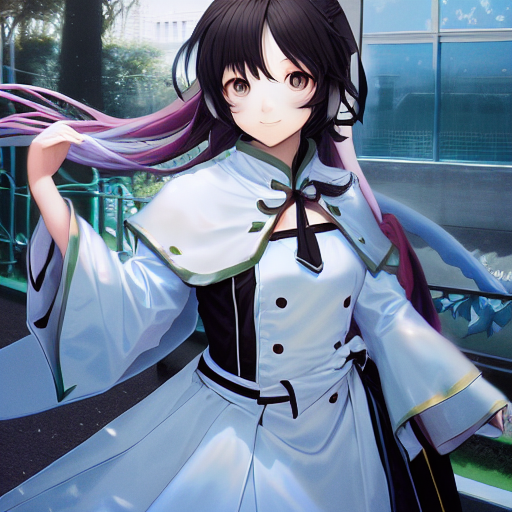

In [4]:
output[0]

### Stable Diffusion(Image2Image) Generator:

In [5]:
from diffusersplus.automodel import diffusion_pipeline

model = diffusion_pipeline(
    task_id="stable-img2img", stable_model_id="dreamlike-art/dreamlike-anime-1.0", scheduler_name="DDIM"
)

In [6]:
output = model(
    image_path="../data/image.png",
    prompt="A photo of a cat.",
    negative_prompt="bad",
    num_images_per_prompt=1,
    num_inference_steps=50,
    guidance_scale=7.0,
    strength=0.5,
    generator_seed=0,
    resize_type="center_crop_and_resize",
    crop_size=512,
    height=512,
    width=512,
)

unet\diffusion_pytorch_model.safetensors not found
100%|██████████| 25/25 [00:03<00:00,  7.35it/s]


In [7]:
image = Image.open("../data/image.png")
images_list = [image, output[0]]

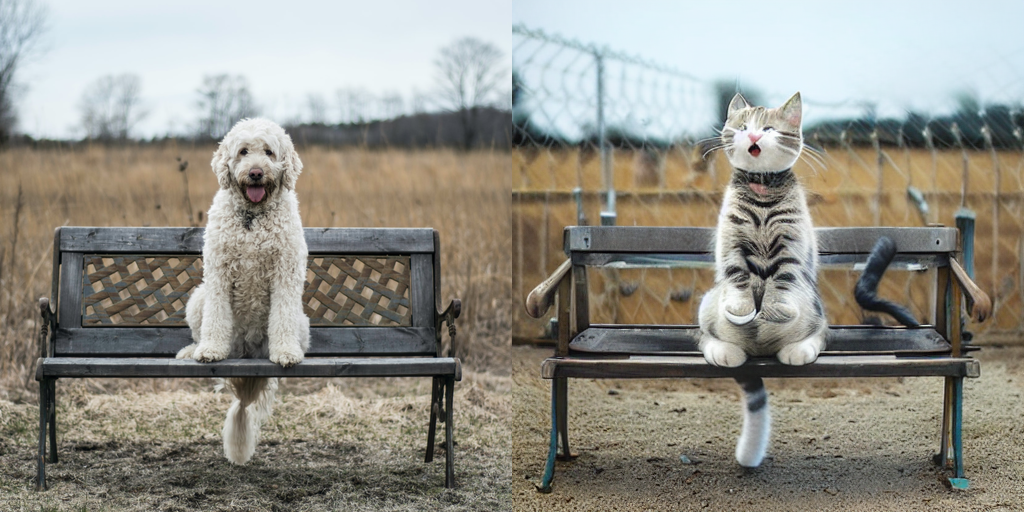

In [8]:
image_grid(images_list, 1, 2)

### Stable Diffusion Upscale Generator:

In [9]:
from diffusersplus.automodel import diffusion_pipeline

model = diffusion_pipeline(
    task_id="stable-upscale", stable_model_id="stabilityai/stable-diffusion-x4-upscaler", scheduler_name="DDIM"
)

In [10]:
output = model(
    image_path="../data/image.png",
    prompt="A photo of a anime character.",
    negative_prompt="bad",
    resize_type="center_crop_and_resize",
    noise_level=20,
    num_images_per_prompt=1,
    num_inference_steps=20,
    guidance_scale=7.0,
    generator_seed=0,
)

text_encoder\model.safetensors not found
c:\Users\kadir\miniconda3\envs\torch_gpu\lib\site-packages\diffusers\pipelines\stable_diffusion\pipeline_stable_diffusion_upscale.py:120: FutureWarning: The configuration file of the vae does not contain `scaling_factor` or it is set to 0.18215, which seems highly unlikely. If your checkpoint is a fine-tuned version of `stabilityai/stable-diffusion-x4-upscaler` you should change 'scaling_factor' to 0.08333 Please make sure to update the config accordingly, as not doing so might lead to incorrect results in future versions. If you have downloaded this checkpoint from the Hugging Face Hub, it would be very nice if you could open a Pull Request for the `vae/config.json` file
  deprecate("wrong scaling_factor", "1.0.0", deprecation_message, standard_warn=False)
100%|██████████| 20/20 [00:46<00:00,  2.30s/it]


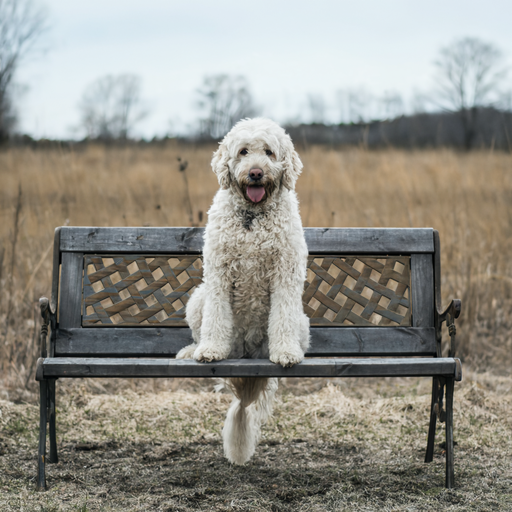

In [11]:
output[0].resize((512, 512))

### Stable Diffusion + Controlnet Generator

In [12]:
from diffusersplus.automodel import diffusion_pipeline

model = diffusion_pipeline(
    task_id="controlnet",
    stable_model_id="dreamlike-art/dreamlike-anime-1.0",
    controlnet_model_id="lllyasviel/sd-controlnet-canny",
    scheduler_name="DDIM",
)

In [13]:
output = model(
    image_path="../data/image.png",
    prompt="A photo of cat.",
    negative_prompt="bad",
    height=512,
    width=512,
    preprocess_type="Canny",
    resize_type="center_crop_and_resize",
    guess_mode=False,
    num_images_per_prompt=1,
    num_inference_steps=50,
    guidance_scale=7.0,
    controlnet_conditioning_scale=0.2,
    generator_seed=0,
)

unet\diffusion_pytorch_model.safetensors not found
100%|██████████| 50/50 [02:04<00:00,  2.50s/it]


In [14]:
image = Image.open("../data/image.png")
images_list = [image, output[0]]

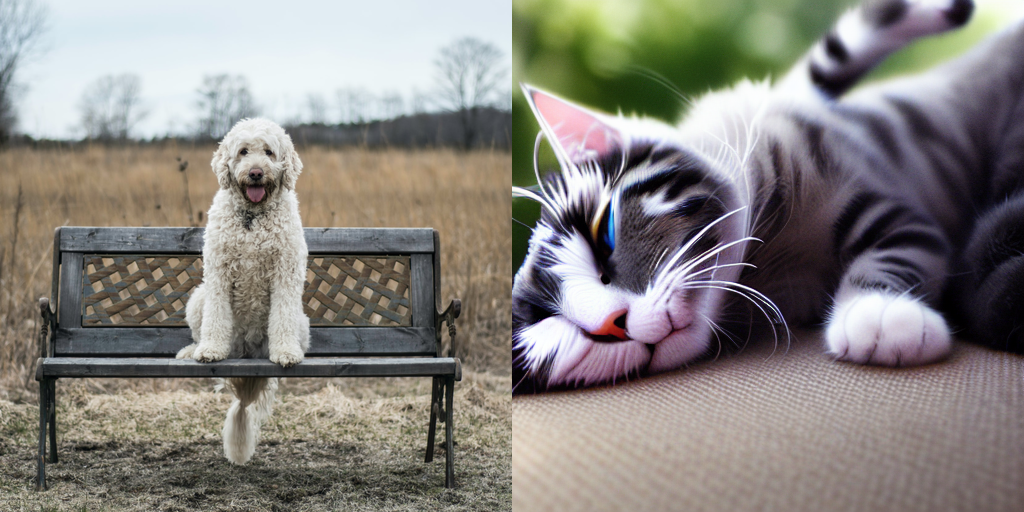

In [15]:
image_grid(images_list, 1, 2)

### Stable Diffusion + Controlnet Inpaint Generator:

In [16]:
from diffusersplus.automodel import diffusion_pipeline

model = diffusion_pipeline(
    task_id="controlnet-inpaint",
    stable_model_id="dreamlike-art/dreamlike-anime-1.0",
    controlnet_model_id="lllyasviel/sd-controlnet-canny",
    scheduler_name="DDIM",
)

In [17]:
output = model(
    image_path="../data/image.png",
    mask_path="../data/mask_image.png",
    prompt="A photo of a cat.",
    negative_prompt="bad",
    height=512,
    width=512,
    preprocess_type="Canny",
    resize_type="center_crop_and_resize",
    strength=0.5,
    guess_mode=False,
    num_images_per_prompt=1,
    num_inference_steps=50,
    guidance_scale=7.0,
    controlnet_conditioning_scale=1.0,
    generator_seed=0,
)

unet\diffusion_pytorch_model.safetensors not found
100%|██████████| 25/25 [01:02<00:00,  2.51s/it]


In [18]:
image = Image.open("../data/image.png")
images_list = [image, output[0]]

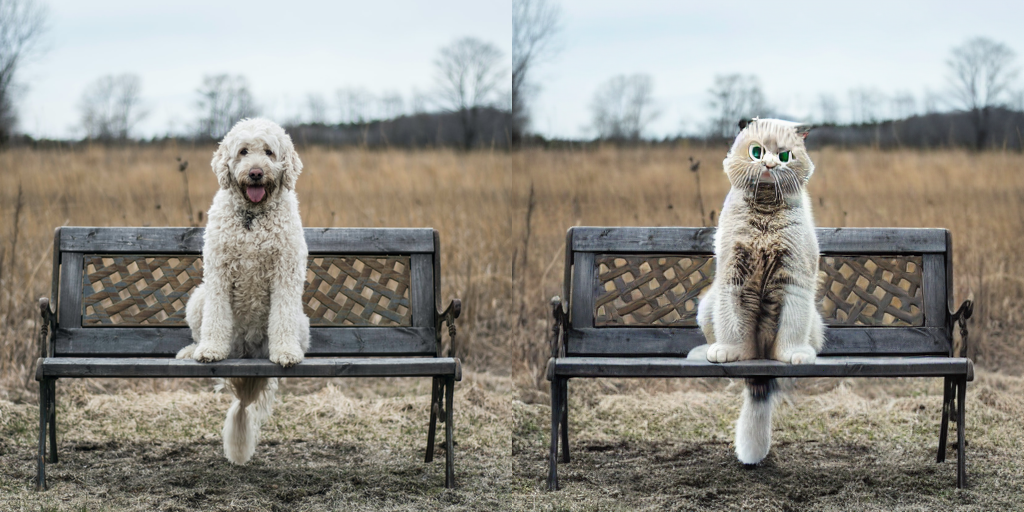

In [19]:
image_grid(images_list, 1, 2)

### Stable Diffusion + Controlnet(Image2Image) Generator:

In [20]:
from diffusersplus.automodel import diffusion_pipeline

model = diffusion_pipeline(
    task_id="controlnet-img2img",
    stable_model_id="dreamlike-art/dreamlike-anime-1.0",
    controlnet_model_id="lllyasviel/sd-controlnet-canny",
    scheduler_name="DDIM",
)

In [28]:
output = model(
    image_path="../data/image.png",
    prompt="A photo of a cat.",
    negative_prompt="bad",
    height=512,
    width=512,
    preprocess_type="Canny",
    resize_type="center_crop_and_resize",
    guess_mode=False,
    num_images_per_prompt=1,
    num_inference_steps=20,
    guidance_scale=7.0,
    controlnet_conditioning_scale=1.0,
    strength=0.5,
    generator_seed=0,
)

100%|██████████| 10/10 [00:25<00:00,  2.50s/it]


In [29]:
image = Image.open("../data/image.png")
images_list = [image, output[0]]

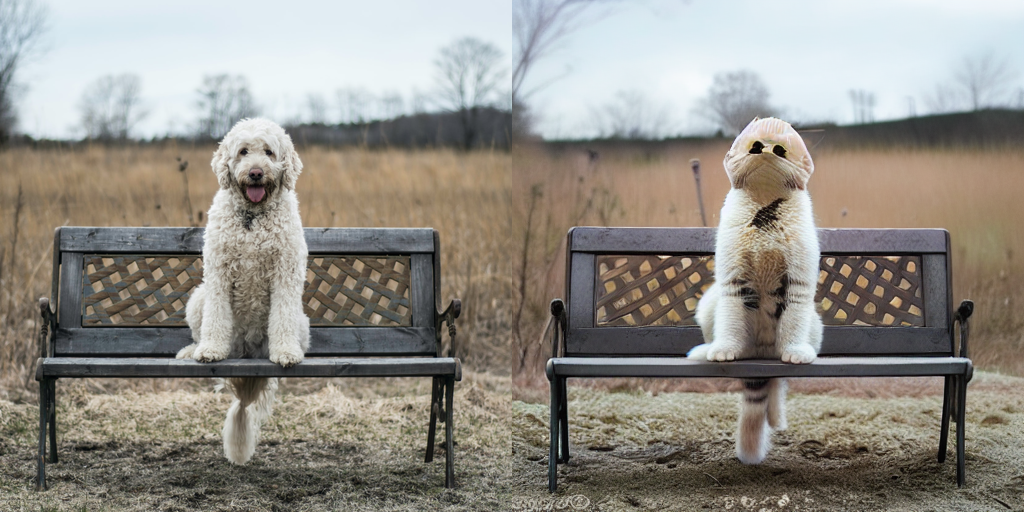

In [30]:
image_grid(images_list, 1, 2)

### Stable Diffusion XL + Controlnet Generator

In [ ]:
from diffusersplus.automodel import diffusion_pipeline

model = diffusion_pipeline(
    task_id="controlnet-sdxl",
    stable_model_id="stabilityai/stable-diffusion-xl-base-1.0",
    controlnet_model_id="diffusers/controlnet-canny-sdxl-1.0",
    vae_model_id="madebyollin/sdxl-vae-fp16-fix",
    scheduler_name="DDIM",
)

In [ ]:
output = model(
    image_path="../data/image.png",
    prompt="A photo of a anime cat character",
    prompt_2="A photo of a anime dog character",
    height=512,
    width=512,
    num_inference_steps=50,
    guidance_scale=5.0,
    negative_prompt="bad",
    negative_prompt_2="bad",
    num_images_per_prompt=1,
    generator_seed=0,
    controlnet_conditioning_scale=1.0,
    guess_mode=False,
    control_guidance_start=0.0,
    control_guidance_end=1.0,
    original_size=None,
    crops_coords_top_left=(0, 0),
    target_size=None,
    preprocess_type="Canny",
    resize_type="center_crop_and_resize",
)

In [ ]:
output[0]

### Stable Diffusion + T2I Adapter Generator

In [ ]:
from diffusersplus.automodel import diffusion_pipeline

model = diffusion_pipeline(
    task_id="controlnet-t2i_adapter",
    stable_model_id="dreamlike-art/dreamlike-diffusion-1.0",
    adapter_model_id="TencentARC/t2iadapter_canny_sd15v2",
    scheduler_name="DDIM",
)

In [ ]:
output = model(
    image_path="../data/image.png",
    prompt="A photo of a cat character.",
    negative_prompt="bad",
    height=512,
    width=512,
    preprocess_type="Canny",
    resize_type="center_crop_and_resize",
    num_images_per_prompt=1,
    num_inference_steps=50,
    guidance_scale=7.0,
    adapter_conditioning_scale=0.2,
    generator_seed=0,
)

In [ ]:
output[0]